# Etude statistique des dataset *arXiv_abstract* et *arXiv_abstract_with_citation*

## Description du dataset [*arXiV_Abstract*](https://huggingface.co/datasets/gfissore/arxiv-abstracts-2021):

"A dataset of metadata including title and abstract for all arXiv articles up to the end of 2021 (~2 million papers). Possible applications include trend analysis, paper recommender engines, category prediction, knowledge graph construction and semantic search interfaces.

In contrast to arxiv_dataset, this dataset doesn't include papers submitted to arXiv after 2021 and it doesn't require any external download." [arXiV_Abstract](https://huggingface.co/datasets/gfissore/arxiv-abstracts-2021)

```json
{  
  "id": "1706.03762",
  "submitter": "Ashish Vaswani",
  "authors": "Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion\n  Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin",
  "title": "Attention Is All You Need",
  "comments": "15 pages, 5 figures",
  "journal-ref": null,
  "doi": null,
  "abstract": "  The dominant sequence transduction models are based on complex recurrent or\nconvolutional neural     
networks in an encoder-decoder configuration. [...] constituency parsing both with large and limited training       
data.\n",
  "report-no": null,
  "categories": [   
    "cs.CL cs.LG"
  ],     
  "versions": [  
    "v1",
    "v2",
    "v3",
    "v4",
    "v5"
  ]
}
```

Data Fields
These fields are detailed on the arXiv:

- id: ArXiv ID (can be used to access the paper)
- submitter: Who submitted the paper
- authors: Authors of the paper
- title: Title of the paper
- comments: Additional info, such as number of pages and figures
- journal-ref: Information about the journal the paper was published in
- doi: Digital Object Identifier
- report-no: Report Number
- abstract: The abstract of the paper
- categories: Categories / tags in the ArXiv system

# Apport à ce dataset

Nous avons pour objectif d'augmenter le dataset arXiv_abstract avec des contexte de citations se rapportant aux articles du dataset.
Pour cela nous avons trouvés dans un autre dataset [*unarXive*](https://github.com/IllDepence/unarXive/blob/master/README_contexts.md) les citations d'articles arXiv extraite.
Ce qui nous rajoute une entrée supplémentaire (*citation_contexts*) aux champs précédents.

> #### Nous étudierons donc ici le dataset *arxiv_abstracts* initial et le dataset augmenté.

***


In [1]:
from datasets import Features, Value, Sequence
from datasets import load_dataset

import pandas as pd
import matplotlib.pyplot as plt
import ast

In [2]:
arxiv_abstract = load_dataset('json', data_files=r'D:\TER\TER_genearation_categorie\unarXive-2020\contexts\arxiv-abstracts.jsonl')

Found cached dataset json (C:/Users/hugol/.cache/huggingface/datasets/json/default-5fc182aa40c80656/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51)


  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
ft = Features({'id': Value('string'),'title': Value('string'), 'citation_contexts': Value('string'), 'abstract': Value('string'), 'categories' : Value('string') })


In [4]:
arxiv_abstract_with_context = load_dataset('csv', data_files=r"D:\TER\TER_genearation_categorie\arxiv_abstracts_with_citations.csv",features=ft)
#arxiv_abstract_with_context = load_dataset('csv', data_files=r'D:\TER\TER_genearation_categorie\arxiv_abstracts_with_citations.csv')

Found cached dataset csv (C:/Users/hugol/.cache/huggingface/datasets/csv/default-916b08faa375e92c/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)


  0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# Sélectionner les entrées dont la colonne "citation_contexts" n'est pas vide
dataset_with_full_citations = arxiv_abstract_with_context.filter(lambda x: x['citation_contexts'] is not None)


Loading cached processed dataset at C:\Users\hugol\.cache\huggingface\datasets\csv\default-916b08faa375e92c\0.0.0\6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-1cb5f72fc2fd593e.arrow


In [6]:
dataset_with_full_citations

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'citation_contexts', 'abstract', 'categories'],
        num_rows: 144636
    })
})

In [7]:
arxiv_abstract_with_context

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'citation_contexts', 'abstract', 'categories'],
        num_rows: 1999486
    })
})

In [39]:
# Pour exporter le dataset
#dataset_with_full_citations["train"].to_csv("res.csv")

#### Quelques statistique descriptives:

In [40]:
"""#pour chercher une article dans le dataset
id_recherche = '1412.8192'
res = [];
for element in dataset_with_full_citations["train"]:
    if element['id'] == id_recherche:
        # Faire quelque chose avec l'élément trouvé
        print((element))
        res=element
        break  # arrêter la boucle si l'élément est trouvé
"""

'#pour chercher une article dans le dataset\nid_recherche = \'1412.8192\'\nres = [];\nfor element in dataset_with_full_citations["train"]:\n    if element[\'id\'] == id_recherche:\n        # Faire quelque chose avec l\'élément trouvé\n        print((element))\n        res=element\n        break  # arrêter la boucle si l\'élément est trouvé\n'

In [41]:
# Compter le nombre d'entrées sans contexte citation
nb_entrees_sans_citation = 0
for entree in arxiv_abstract_with_context["train"]:
    if entree['citation_contexts'] is None:
        nb_entrees_sans_citation += 1
print(f"Nombre d'entrées sans contexte citation : {nb_entrees_sans_citation}")


Nombre d'entrées sans contexte citation : 1854850


In [42]:
# Fonction pour compter le nombre de mots dans une chaîne de caractères
def count_words(s):
    return len(s.split())

# Compter le nombre moyen de mots dans les citations
citation_contexts = arxiv_abstract_with_context["train"]['citation_contexts']
nb_citations = len(citation_contexts)
nb_mots_total = sum(count_words(s) for s in citation_contexts if s is not None)
moyenne_nb_mots = nb_mots_total / nb_citations
print(f"Nombre moyen de mots dans les citations : {moyenne_nb_mots}")


Nombre moyen de mots dans les citations : 133.94936148590187


In [62]:
"""# Dictionnaire pour stocker le nombre de citations pour chaque ID
nb_citations_par_id = {}

# Parcourir les entrées et mettre à jour le dictionnaire avec le nombre de citations pour chaque ID
for entree in arxiv_abstract_with_context["train"]:
    id = entree['id']
    citations = entree['citation_contexts']
    if citations is not None:
        citations_list = ast.literal_eval(citations)
        nb_citations = len(citations_list)
        if id in nb_citations_par_id:
            nb_citations_par_id[id] += nb_citations
        else:
            nb_citations_par_id[id] = nb_citations

# Calculer la moyenne du nombre de citations pour chaque ID
nb_id = len(nb_citations_par_id)
nb_citations_total = sum(nb_citations_par_id.values())
moyenne_nb_citations = nb_citations_total / nb_id
print(f"Nombre moyen de citations par ID : {moyenne_nb_citations}")
"""

'# Dictionnaire pour stocker le nombre de citations pour chaque ID\nnb_citations_par_id = {}\n\n# Parcourir les entrées et mettre à jour le dictionnaire avec le nombre de citations pour chaque ID\nfor entree in arxiv_abstract_with_context["train"]:\n    id = entree[\'id\']\n    citations = entree[\'citation_contexts\']\n    if citations is not None:\n        citations_list = ast.literal_eval(citations)\n        nb_citations = len(citations_list)\n        if id in nb_citations_par_id:\n            nb_citations_par_id[id] += nb_citations\n        else:\n            nb_citations_par_id[id] = nb_citations\n\n# Calculer la moyenne du nombre de citations pour chaque ID\nnb_id = len(nb_citations_par_id)\nnb_citations_total = sum(nb_citations_par_id.values())\nmoyenne_nb_citations = nb_citations_total / nb_id\nprint(f"Nombre moyen de citations par ID : {moyenne_nb_citations}")\n'

#### Tokenization

In [8]:
from transformers import BartTokenizerFast

tokenizer = BartTokenizerFast.from_pretrained("facebook/bart-base")


None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [9]:
dataset_with_full_citations

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'citation_contexts', 'abstract', 'categories'],
        num_rows: 144636
    })
})

In [10]:
encoded_dataset = dataset_with_full_citations.map(lambda examples: tokenizer(examples["citation_contexts"]), batched=True)

Loading cached processed dataset at C:\Users\hugol\.cache\huggingface\datasets\csv\default-916b08faa375e92c\0.0.0\6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-5d3bae576db16b67.arrow


In [47]:
encoded_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'citation_contexts', 'abstract', 'categories', 'input_ids', 'attention_mask'],
        num_rows: 144636
    })
})

#### Statistique sur le dataset sans article n'ayant pas de citation

In [11]:
dataset_with_full_citations.set_format(type="pandas")

In [12]:
df = dataset_with_full_citations['train'][:]

In [13]:
df['categories'] = df['categories'].apply(ast.literal_eval)
df['categories'] = df['categories'].apply(lambda x: x[0].split())
df = df.explode('categories')


In [14]:
n_categories = df.explode("categories")["categories"].nunique()
print(f"Le nombre de catégories différentes dans le dataframe est : {n_categories}")


Le nombre de catégories différentes dans le dataframe est : 155


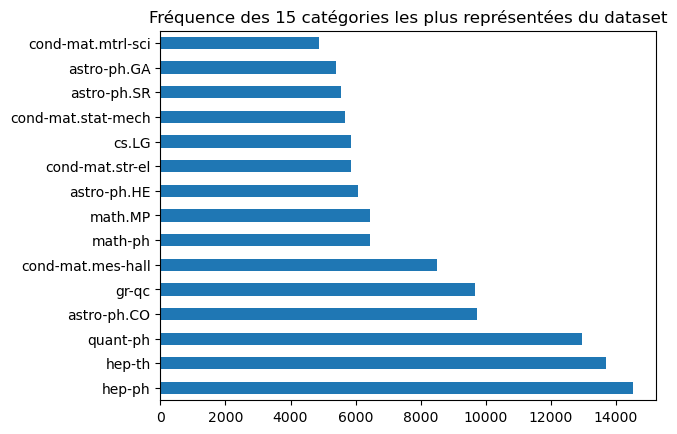

In [15]:
df["categories"].value_counts(ascending=True).nlargest(15).plot.barh()
plt.title("Fréquence des 15 catégories les plus représentées du dataset")
plt.show()

#### Statistique sur le dataset tokenisé

In [16]:
encoded_dataset.set_format(type="pandas")

In [17]:
df2 = encoded_dataset['train'][:]

In [18]:
#séparation des catégorie du dataset
df2['categories'] = df2['categories'].apply(ast.literal_eval)

df2['categories'] = df2['categories'].apply(lambda x: x[0].split())

df2 = df2.explode('categories')

In [57]:
num_tokens = df2["input_ids"].apply(lambda x: len(x)).mean()
print("Nombre moyen de tokens par contexte de citation : ", num_tokens)

Nombre moyen de tokens par contexte de citation :  3439.2624305879363


In [58]:
encoded_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'citation_contexts', 'abstract', 'categories', 'input_ids', 'attention_mask'],
        num_rows: 144636
    })
})

In [59]:
"""# Compter le nombre d'exemples dans chaque catégorie
category_counts = df2["categories"].value_counts()

# Sélectionner les 10 catégories les plus nombreuses
top_categories = category_counts.head(10).index

# Filtrer le DataFrame pour ne garder que les exemples appartenant à ces catégories
df_top_categories = df2[df2["categories"].isin(top_categories)]

# Ajouter une colonne pour le nombre de mots par citation
df_top_categories["Words Per Citation"] = df_top_categories["input_ids"].apply(lambda x: len(x)).astype(int)

# Grouper les données par catégorie
grouped_data = df_top_categories.groupby("categories")

# Créer un sous-plot pour chaque catégorie
fig, axs = plt.subplots(nrows=len(grouped_data), figsize=(15, 4*len(grouped_data)), sharey=True)

# Générer un boxplot pour chaque catégorie
for i, (category, data) in enumerate(grouped_data):
    data.boxplot(column="Words Per Citation", ax=axs[i], showfliers=False)
    axs[i].set_title(category)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("Nombre de token")
    #axs[i].set_ylim(0, 4000) # Changer l'échelle de l'axe des ordonnées


# Ajouter un titre pour le plot
plt.suptitle("Distribution du nombre de mots par contexte de citation et par catégorie (top 10)")
plt.show()
"""

'# Compter le nombre d\'exemples dans chaque catégorie\ncategory_counts = df2["categories"].value_counts()\n\n# Sélectionner les 10 catégories les plus nombreuses\ntop_categories = category_counts.head(10).index\n\n# Filtrer le DataFrame pour ne garder que les exemples appartenant à ces catégories\ndf_top_categories = df2[df2["categories"].isin(top_categories)]\n\n# Ajouter une colonne pour le nombre de mots par citation\ndf_top_categories["Words Per Citation"] = df_top_categories["input_ids"].apply(lambda x: len(x)).astype(int)\n\n# Grouper les données par catégorie\ngrouped_data = df_top_categories.groupby("categories")\n\n# Créer un sous-plot pour chaque catégorie\nfig, axs = plt.subplots(nrows=len(grouped_data), figsize=(15, 4*len(grouped_data)), sharey=True)\n\n# Générer un boxplot pour chaque catégorie\nfor i, (category, data) in enumerate(grouped_data):\n    data.boxplot(column="Words Per Citation", ax=axs[i], showfliers=False)\n    axs[i].set_title(category)\n    axs[i].set_xla

C:\Users\hugol\AppData\Local\Temp\ipykernel_21536\60146841.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_categories[""] = df_top_categories["input_ids"].apply(lambda x: len(x)).astype(int)


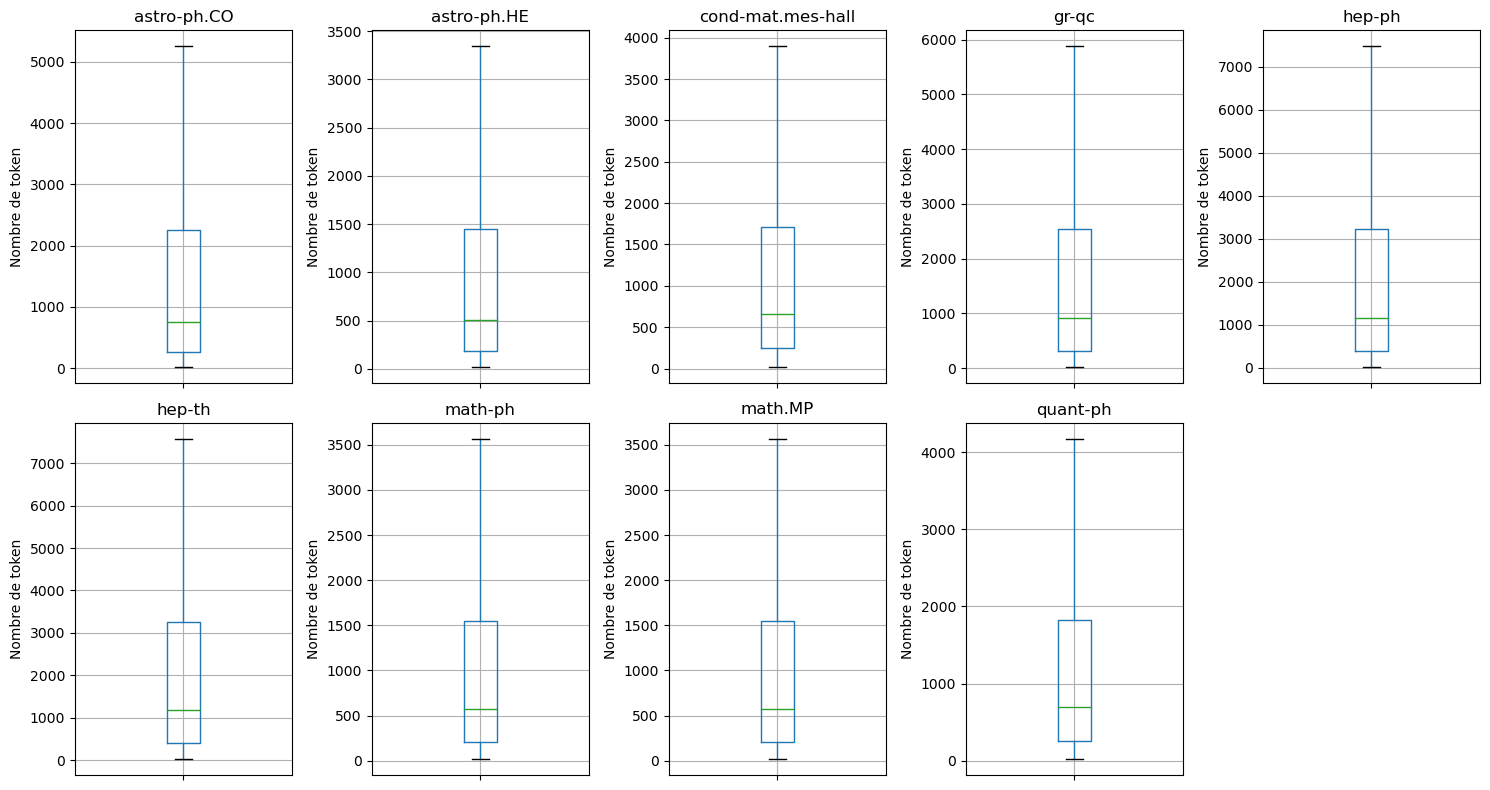

In [21]:
import matplotlib.pyplot as plt

# Compter le nombre d'exemples dans chaque catégorie
category_counts = df2["categories"].value_counts()

# Sélectionner les 10 catégories les plus nombreuses
top_categories = category_counts.head(9).index

# Filtrer le DataFrame pour ne garder que les exemples appartenant à ces catégories
df_top_categories = df2[df2["categories"].isin(top_categories)]

# Ajouter une colonne pour le nombre de mots par citation
df_top_categories[""] = df_top_categories["input_ids"].apply(lambda x: len(x)).astype(int)

# Grouper les données par catégorie
grouped_data = df_top_categories.groupby("categories")

# Définir le nombre de lignes et de colonnes pour le sous-plot
nrows = 2
ncols = 5

# Créer un figure avec les sous-plots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 8))

# Aplatir les axes pour faciliter l'indexation
axs = axs.flatten()

# Générer un boxplot pour chaque catégorie
for i, (category, data) in enumerate(grouped_data):
    data.boxplot(ax=axs[i], showfliers=False)
    axs[i].set_title(category)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("Nombre de token")
    #axs[i].set_ylim(0, 4000) # Changer l'échelle de l'axe des ordonnées

# Supprimer les sous-plots vides
for i in range(len(top_categories), nrows*ncols):
    fig.delaxes(axs[i])

# Ajouter un titre pour le plot


# Ajuster les espaces entre les sous-plots
plt.tight_layout()

plt.show()


In [61]:
len(df2["categories"].value_counts())

155